# Estimating Coordinated Daily Activity Patterns

This notebook illustrates how to re-estimate ActivitySim's CDAP model. This process 
includes running ActivitySim in estimation mode to read household travel survey files and write out
the estimation data bundles used in this notebook.  To review how to do so, please visit the other
notebooks in this directory.

# Load libraries

In [38]:
import numpy as np
import pandas as pd
import larch
import os
import matplotlib.pyplot as plt

pd.options.display.max_columns = 150

In [39]:
os.chdir('C:\ABM3_dev\outputs')

In [40]:
persons = pd.read_csv(r'output\final_persons.csv')
households = pd.read_csv(r'output\final_households.csv')

C:\Users\davidh\AppData\Local\Temp\2\ipykernel_6116\3892607003.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  persons = pd.read_csv(r'output\final_persons.csv')


In [41]:
households.head()

,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,children,day,bldgsz,res_type,transponder_ownership,survey_year,day.1,HH_ID,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,income_in_thousands,income_segment,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_6_to_12,num_children_5_to_15,num_children_16_to_17,num_gradeschool,num_highschool,num_college_age,num_young_adults,num_predrive_child,num_nonworker_adults,num_university_students,num_fullTime_workers,num_partTime_workers,num_retired_adults,num_highschool_graduates,num_children_6_to_15,num_young_retirees,num_old_retirees,non_family,family,home_is_urban,home_is_rural,num_hh_in_zone,av_ownership,workplace_location_accessibility,shopping_accessibility,othdiscr_accessibility,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,auPkRetail,auPkTotal,auOpRetail,auOpTotal,trPkRetail,trPkTotal,trPkHH,...,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,num_hh_joint_tours
0,1,13119,59582.50,4,1,2,1,2,1,2,1,False,2016,1,161000385,2.0,1.0,3.0,4.0,NaN,1,1,1,0_tours,0.0,0.0,1,59.58250,2,3,2,2,2,0,2,2,0,2,0,0,0,2,1,0,0,1,0,2,2,0,0,False,True,False,False,14,False,10.800842,11.217657,14.884606,0.0,0,4,2,0,2,4,False,9.114823,11.525027,9.528020,11.959262,8.057191,10.158213,9.705998,...,0,0,0,0,0,0,0,4,0,0,0,0,0,432801,432801,3,4,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0,0,NaN,NaN,9999.000,9999.000,0.4980,1.38073,0.09540,0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0
1,2,19303,34497.50,2,1,2,0,0,1,2,1,False,2016,1,161000451,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,34.49750,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1,0,False,True,False,False,7,False,10.394149,11.339877,13.464349,0.0,0,2,2,0,0,2,False,8.845941,11.046439,9.132367,11.360222,5.187108,7.315624,7.712888,...,0,0,0,0,0,0,0,10,0,0,0,0,0,432901,432901,7,4,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,7.2567,33.7884,33.7884,33.7884,120,0,0,11,2.1970,2.5400,6.8756,1.2043,1,1,1,6025.9783,1260,NaN,0,0,NaN,NaN,0.560,1.000,7.2306,0.16163,0.20648,0,1.302222,4.321010,0.295960,0.241152,False,0,156,True,0
2,3,12446,7727.50,1,4,1,0,0,1,8,4,False,2016,1,161000525,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,7.72750,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,True,False,False,False,14,False,11.403241,12.191229,14.323247,0.0,0,1,1,0,0,1,False,9.623196,11.774019,9.884143,12.113552,6.207654,8.333393,8.881074,...,0,0,0,0,0,0,0,5,0,0,0,0,0,411201,423101,5,4,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,13,11.4048,8.3940,8.3940,8.3940,120,0,0,40,5.4644,9.8891,16.0063,4.2917,1,1,2,16573.0548,4167,NaN,0,0,NaN,NaN,0.181,0.123,9.0316,0.2

In [42]:
persons.head()

,person_id,household_id,PNUM,age,sex,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,external_worker_identification,external_workplace_zone_id,transit_pass_subsidy,transit_pass_ownership,industry,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_eatout,_social,_othdiscr,non_mandatory_tour_frequency,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_preschool,is_gradeschool,is_highschool,is_university,school_segment,is_worker,is_fulltime_worker,is_parttime_worker,is_internal_worker,is_external_worker,home_zone_id,time_factor_work,time_factor_nonwork,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,is_out_of_home_worker,external_workplace_location_logsum,external_workplace_modechoice_logsum,school_location_logsum,school_modechoice_logsum,distance_to_school,roundtrip_auto_time_to_school,workplace_location_logsum,workplace_modechoice_logsum,distance_to_work,workplace_in_cbd,work_zone_area_type,auto_time_home_to_work,roundtrip_auto_time_to_work,work_auto_savings,dparkcost_work,non_toll_time_work,toll_time_work,toll_dist_work,toll_cost_work,toll_travel_time_savings_work,travel_active,under16_not_at_school,has_preschool_kid_at_home,has_school_kid_at_home,work_and_school_and_worker,work_and_school_and_student,num_mand,num_work_tours,has_pre_school_child_with_mandatory,has_driving_age_child_with_mandatory,num_joint_tours,num_non_mand,num_escort_tours,num_eatout_tours,num_shop_tours,num_maint_tours,num_discr_tours,num_social_tours,num_non_escort_tours,num_shop_maint_tours,num_shop_maint_escort_tours,num_add_shop_maint_tours,num_soc_discr_tours,num_add_soc_discr_tours
0,1,1,1,49,2,2,3,False,2,-1,5476,True,False,No_Telecommute,1,13,1,-1,0,0,healthcare,N,NaN,1,0,0,1,0,1,96,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,True,True,False,13119,0.407362,0.648903,False,True,False,False,False,True,False,True,True,NaN,NaN,NaN,NaN,NaN,0.000000,-0.934631,-0.934631,8.677074,False,3.0,22.062183,44.685173,0.0,0.0,22.062183,22.062183,0.0,0.0,0.0,True,False,False,False,False,False,0,0,False,False,0,3,1,1,0,0,1,0,2,0,1,0,1,0
1,2,1,2,52,1,3,3,False,4,-1,-1,False,False,NaN,1,13,1,-1,0,0,NaN,N,NaN,0,0,0,0,0,1,1,False,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,13119,0.279769,0.612654,False,True,False,False,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,True,False,False,False,False,False,0,0,False,False,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,3,1,3,7,2,4,1,True,7,13464,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,0,0,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,2,False,False,False,False,False,13119,0.412113,1.453034,False,True,False,False,False,True,False,True,False,NaN,NaN,0.862784,0.862784,3.675232,23.554642,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,True,False,False,False,False,False,1,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,4,9,2,4,1,True,7,13731,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,1,1,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,2,False,False,False,False,False,13119,0.759176,0.316427,False,True,False,False,False,True,False,True,False,NaN,NaN,0.627952,0.627952,3.983066,20.526710,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,True,False,False,False,False,False,1,0,False,False,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,5,2,1,61,2,3,3,F

In [43]:
cdap_dir = r'output\estimation_data_bundle\cdap'
full_edb = pd.read_csv(os.path.join(cdap_dir, 'cdap_values_combined_full.csv'))

C:\Users\davidh\AppData\Local\Temp\2\ipykernel_6116\2743892615.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  full_edb = pd.read_csv(os.path.join(cdap_dir, 'cdap_values_combined_full.csv'))


In [44]:
hhs_with_missing_model_choice = full_edb[full_edb.model_choice.isna()].household_id.unique()
print(len(hhs_with_missing_model_choice))
households['person_count'] = persons.groupby(['household_id']).person_id.count().values
assert (persons.groupby(['household_id']).person_id.count().index == households.household_id).all()
hhs_with_hhsize_not_correct = households[households.person_count != households.hhsize].household_id.unique()
print(len(hhs_with_hhsize_not_correct))
# difference is households with hhsize > 5

435
438


In [45]:
print("Number of total people requiring cdap:", len(full_edb))
# df = full_edb[full_edb.hhsize <= 10]
df = full_edb[~full_edb.model_choice.isna()].copy()
# df = full_edb[~full_edb.model_choice.isna() & (full_edb.survey_year == 2016)].copy()
print("Number of people with hhsize <= 2:", len(df))

Number of total people requiring cdap: 96881
Number of people with hhsize <= 2: 96106


In [46]:
# Creating expressions that need to use numpy since larch estimation code doesn't parse it well
df['tmp_base_work_mc_logsum'] = np.where((df.is_external_worker == True), df.external_workplace_location_logsum.fillna(0), df.workplace_location_logsum.fillna(0))
df['tmp_ptype1_work_mc_logsum'] = (df.ptype == 1) * np.where((df.is_external_worker == True), df.external_workplace_location_logsum.fillna(0), df.workplace_location_logsum.fillna(0))
df['tmp_ptype2_work_mc_logsum'] = (df.ptype == 2) * np.where((df.is_external_worker == True), df.external_workplace_location_logsum.fillna(0), df.workplace_location_logsum.fillna(0))
df['tmp_ptype3_school_mc_logsum'] = np.where((df.ptype == 3)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)
df['tmp_ptype6_school_mc_logsum'] = np.where((df.ptype == 6)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)
df['tmp_ptype7_school_mc_logsum'] = np.where((df.ptype == 7)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)

In [47]:
df.auto_ownership.value_counts()

2    42936
1    29082
3    13448
4     5551
0     5089
Name: auto_ownership, dtype: int64

In [48]:
df.to_csv(os.path.join(cdap_dir, 'cdap_values_combined.csv'), index=False)

In [49]:
spec = pd.read_csv(os.path.join(cdap_dir, 'cdap_INDIV_AND_HHSIZE1_SPEC.csv'))
coeffs = spec[['M', 'N', 'H']].melt(value_name='coefficient_name')
coeffs = coeffs[~coeffs.coefficient_name.isna()].drop(columns='variable').drop_duplicates(subset='coefficient_name', keep='first')
coeffs['value'] = 0.0
coeffs['constrain'] = 'F'
coeffs.set_index('coefficient_name', inplace=True)
coeffs.loc['coef_UNAVAILABLE'] = (-999.0, 'T')
coeffs.to_csv(os.path.join(cdap_dir, 'coef_helper.csv'))

# Load data and prep model for estimation

In [50]:
modelname = "cdap"

# import importlib
# importlib.reload(activitysim.estimation.larch)
from activitysim.estimation.larch import component_model
model, data = component_model(modelname, return_data=True)

c:\abm3_dev\activitysim\activitysim\estimation\larch\cdap.py:390: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)


Including joint tour utiltiy?: False


c:\abm3_dev\activitysim\activitysim\estimation\larch\cdap.py:390: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>


# Review Inputs

## Settings

In [51]:
data.settings

┣          INDIV_AND_HHSIZE1_SPEC: 'cdap_indiv_and_hhsize1.csv'
┣                    COEFFICIENTS: 'cdap_coefficients.csv'
┣        INTERACTION_COEFFICIENTS: 'cdap_interaction_coefficients.csv'
┣ FIXED_RELATIVE_PROPORTIONS_SPEC: 'cdap_fixed_relative_proportions.csv'
┣          ADD_JOINT_TOUR_UTILITY: True
┣         JOINT_TOUR_COEFFICIENTS: 'cdap_joint_tour_coefficients.csv'
┣       JOINT_TOUR_USEFUL_COLUMNS: ---
┃                                  - auto_ownership
┃                                  - income
┃                                  - num_workers
┃                                  - shopping_accessibility
┃                                  - workplace_modechoice_logsum
┃                                  ...
┣                       CONSTANTS: ┣       FULL: 1
┃                                  ┣       PART: 2
┃                                  ┣ UNIVERSITY: 3
┃                                  ┣    NONWORK: 4
┃                                  ┣    RETIRED: 5
┃                   

## Households

In [52]:
data.households

,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,children,day,bldgsz,res_type,transponder_ownership,survey_year,day.1,HH_ID,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,income_in_thousands,income_segment,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_6_to_12,num_children_5_to_15,num_children_16_to_17,num_gradeschool,num_highschool,num_college_age,num_young_adults,num_predrive_child,num_nonworker_adults,num_university_students,num_fullTime_workers,num_partTime_workers,num_retired_adults,num_highschool_graduates,num_children_6_to_15,num_young_retirees,num_old_retirees,non_family,family,home_is_urban,home_is_rural,num_hh_in_zone,av_ownership,workplace_location_accessibility,shopping_accessibility,othdiscr_accessibility,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,auPkRetail,auPkTotal,auOpRetail,auOpTotal,trPkRetail,trPkTotal,trPkHH,...,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,num_hh_joint_tours
0,1,13119,59582.50,4,1,2,1,2,1,2,1,False,2016,1,161000385,2.0,1.0,3.0,4.0,NaN,1,1,1,0_tours,0.0,0.0,1,59.58250,2,3,2,2,2,0,2,2,0,2,0,0,0,2,1,0,0,1,0,2,2,0,0,False,True,False,False,14,False,10.800842,11.217657,14.884606,0.0,0,4,2,0,2,4,False,9.114823,11.525027,9.528020,11.959262,8.057191,10.158213,9.705998,...,0,0,0,0,0,0,0,4,0,0,0,0,0,432801,432801,3,4,0,0,0.000000,0,0,0,0.000000,0,0,0.000000,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0,0,NaN,NaN,9999.000,9999.000,0.4980,1.38073,0.09540,0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0
1,2,19303,34497.50,2,1,2,0,0,1,2,1,False,2016,1,161000451,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,34.49750,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1,0,False,True,False,False,7,False,10.394149,11.339877,13.464349,0.0,0,2,2,0,0,2,False,8.845941,11.046439,9.132367,11.360222,5.187108,7.315624,7.712888,...,0,0,0,0,0,0,0,10,0,0,0,0,0,432901,432901,7,4,0,0,0.000000,0,0,0,0.000000,0,0,0.000000,0.0000,0.0000,0.0,0,0,0,0,0,0,1,1,7.2567,33.7884,33.7884,33.7884,120,0,0,11,2.1970,2.5400,6.8756,1.2043,1,1,1,6025.9783,1260,NaN,0,0,NaN,NaN,0.560,1.000,7.2306,0.16163,0.20648,0,1.302222,4.321010,0.295960,0.241152,False,0,156,True,0
2,3,12446,7727.50,1,4,1,0,0,1,8,4,False,2016,1,161000525,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,7.72750,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,True,False,False,False,14,False,11.403241,12.191229,14.323247,0.0,0,1,1,0,0,1,False,9.623196,11.774019,9.884143,12.113552,6.207654,8.333393,8.881074,...,0,0,0,0,0,0,0,5,0,0,0,0,0,411201,423101,5,4,0,0,0.000000,0,0,0,0.000000,0,0,0.000000,0.0000,0.0000,0.0,0,0,0,0,0,0,1,13,11.4048,8.3940,8.3940,8.3940,120,0,0,40,5.4644,9.8891,16.0063,4.29

## Person Data

In [53]:
data.person_data

,person_id,model_choice,override_choice,household_id,PNUM,age,sex,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,external_worker_identification,external_workplace_zone_id,transit_pass_subsidy,transit_pass_ownership,industry,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_eatout,_social,_othdiscr,non_mandatory_tour_frequency,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_preschool,is_gradeschool,is_highschool,is_university,school_segment,is_worker,is_fulltime_worker,is_parttime_worker,is_internal_worker,is_external_worker,home_zone_id,time_factor_work,time_factor_nonwork,naics_code,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,is_out_of_home_worker,external_workplace_location_logsum,external_workplace_modechoice_logsum,school_location_logsum,school_modechoice_logsum,distance_to_school,...,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,chunk_id,tmp_base_work_mc_logsum,tmp_ptype1_work_mc_logsum,tmp_ptype2_work_mc_logsum,tmp_ptype3_school_mc_logsum,tmp_ptype6_school_mc_logsum,tmp_ptype7_school_mc_logsum,cdap_rank
0,1,M,N,1,1,49,2,2,3,False,2,-1,5476,True,False,No_Telecommute,1,13,1,-1,0,0,healthcare,N,NaN,1,0,0,1,0,1,96,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,True,True,False,13119,0.407362,0.648903,0,False,True,False,False,False,True,False,True,True,NaN,NaN,NaN,NaN,NaN,...,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0,-0.934631,-0.000000,-0.934631,0.0,0.0,0.000000,1
1,2,N,N,1,2,52,1,3,3,False,4,-1,-1,False,False,NaN,1,13,1,-1,0,0,NaN,N,NaN,0,0,0,0,0,1,1,False,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,13119,0.279769,0.612654,0,False,True,False,False,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN,...,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4
2,3,M,M,1,3,7,2,4,1,True,7,13464,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,0,0,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,2,False,False,False,False,False,13119,0.412113,1.453034,0,False,True,False,False,False,True,False,True,False,NaN,NaN,0.862784,0.862784,3.675232,...,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0

In [54]:
data.person_data.workplace_modechoice_logsum.value_counts()

-0.934631     1
 1.468813     1
-2.639483     1
-7.427948     1
-0.638456     1
             ..
 0.338677     1
-2.999844     1
-7.290760     1
-13.467850    1
-1.711444     1
Name: workplace_modechoice_logsum, Length: 37867, dtype: int64

In [55]:
data.person_data.tmp_ptype1_work_mc_logsum.value_counts()

-0.000000    64653
-3.416524        1
-3.137156        1
-5.187479        1
-3.553834        1
             ...  
-0.077873        1
-1.953384        1
-1.947309        1
-4.459334        1
-1.711444        1
Name: tmp_ptype1_work_mc_logsum, Length: 31454, dtype: int64

In [56]:
data.person_data.tmp_ptype1_work_mc_logsum.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
96101    False
96102    False
96103    False
96104    False
96105    False
Name: tmp_ptype1_work_mc_logsum, Length: 96106, dtype: bool

<AxesSubplot: >

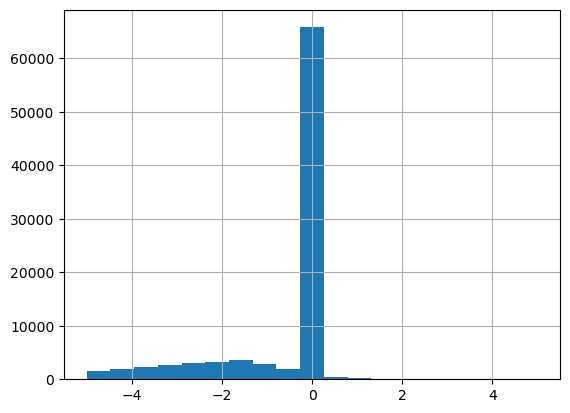

In [57]:
data.person_data.tmp_ptype1_work_mc_logsum.hist(bins=np.linspace(-5,5,20))

<AxesSubplot: >

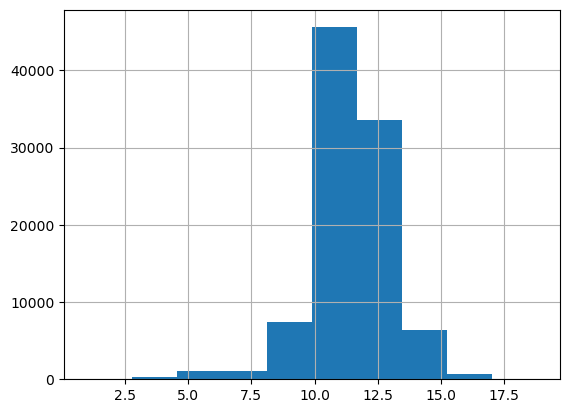

In [58]:
data.person_data.shopping_accessibility.hist()

<AxesSubplot: >

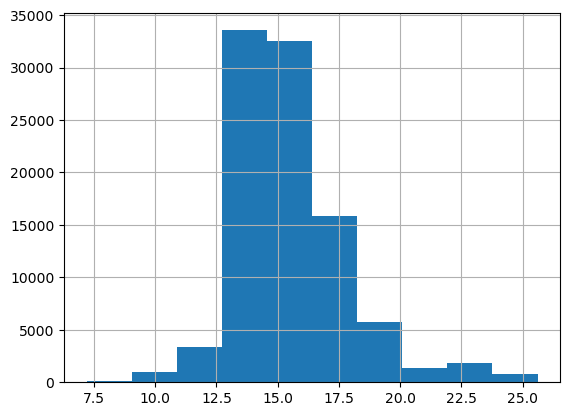

In [59]:
data.person_data.othdiscr_accessibility.hist()

In [60]:
(data.person_data.override_choice == data.person_data.cdap_activity).all()

True

In [61]:
df = data.person_data.copy()
df['mand_status'] = np.select(condlist=[df.is_worker, df.is_student, (df.is_worker & df.is_student), ~(df.is_worker | df.is_student)], choicelist=['worker', 'student', 'both', 'neither'])
pd.crosstab(df.mand_status, df.override_choice, margins=True)

override_choice,H,M,N,All
mand_status,,,,
neither,22387,0,6530,28917
student,13286,2320,2274,17880
worker,32955,9369,6985,49309
All,68628,11689,15789,96106


In [62]:
pd.crosstab(df.telecommute_frequency, df.override_choice, margins=True)

override_choice,H,M,N,All
telecommute_frequency,,,,
1_day_week,3081,1455,545,5081
2_3_days_week,1373,309,370,2052
4_days_week,397,196,315,908
No_Telecommute,19662,7346,2937,29945
All,24513,9306,4167,37986


In [63]:
def create_N_by_access(df, bins=10):
    df['non_mand_access'] = (df.shopping_accessibility + df.othdiscr_accessibility) / 2
    df['non_mand_access_binned'], bins = pd.cut(df.non_mand_access, bins=10, retbins=True)
    df['N_cdap'] = np.where(df.override_choice == 'N', 1, 0)
    N_by_access = df.groupby('non_mand_access_binned').agg({'person_id': 'count', 'N_cdap': 'sum'}).rename(columns={'person_id': 'num_persons'})
    N_by_access['percent_N'] = (N_by_access.N_cdap / N_by_access.num_persons).round(3) * 100
    return N_by_access

def create_M_by_access(df, bins=10):
    df['non_mand_access'] = (df.shopping_accessibility + df.othdiscr_accessibility) / 2
    df['non_mand_access_binned'], bins = pd.cut(df.non_mand_access, bins=10, retbins=True)
    df['M_cdap'] = np.where(df.override_choice == 'M', 1, 0)
    M_by_access = df.groupby('non_mand_access_binned').agg({'person_id': 'count', 'M_cdap': 'sum'}).rename(columns={'person_id': 'num_persons'})
    M_by_access['percent_M'] = (M_by_access.M_cdap / M_by_access.num_persons).round(3) * 100
    return M_by_access

,num_persons,M_cdap,percent_M
non_mand_access_binned,,,
"(4.069, 5.846]",87,2,2.3
"(5.846, 7.605]",388,22,5.7
"(7.605, 9.364]",1410,119,8.4
"(9.364, 11.123]",3395,391,11.5
"(11.123, 12.882]",33505,4276,12.8
"(12.882, 14.641]",36482,4554,12.5
"(14.641, 16.401]",15404,1838,11.9
"(16.401, 18.16]",3231,359,11.1
"(18.16, 19.919]",2004,115,5.7


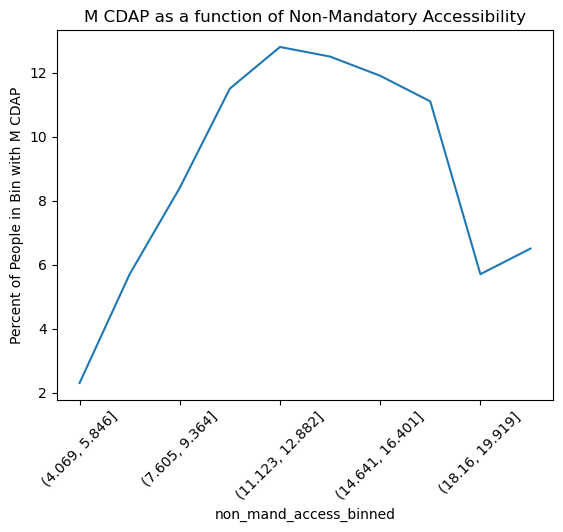

In [64]:
M_by_access_total = create_M_by_access(df, bins=10)
display(M_by_access_total)
M_by_access_total.percent_M.plot()
plt.xticks(rotation=45)
plt.ylabel('Percent of People in Bin with M CDAP')
plt.title('M CDAP as a function of Non-Mandatory Accessibility')
plt.show()

,num_persons,N_cdap,percent_N
non_mand_access_binned,,,
"(7.588, 8.924]",68,22,32.4
"(8.924, 10.246]",65,15,23.1
"(10.246, 11.568]",328,115,35.1
"(11.568, 12.89]",1274,429,33.7
"(12.89, 14.213]",1188,406,34.2
"(14.213, 15.535]",753,267,35.5
"(15.535, 16.857]",321,110,34.3
"(16.857, 18.179]",121,31,25.6
"(18.179, 19.501]",103,22,21.4


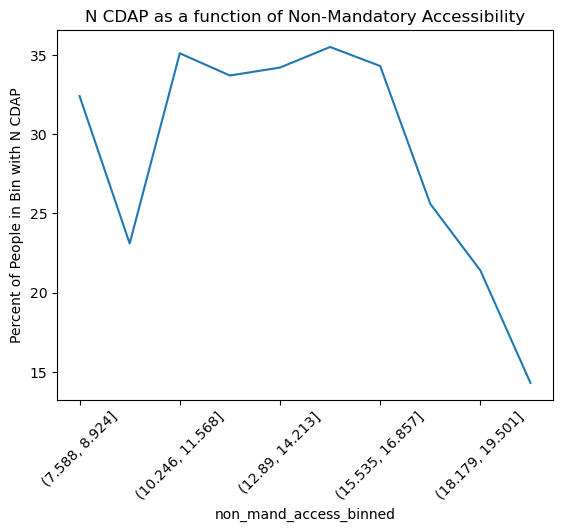

In [65]:
N_by_access_total = create_N_by_access(df[df.work_from_home], bins=10)
display(N_by_access_total)
N_by_access_total.percent_N.plot()
plt.xticks(rotation=45)
plt.ylabel('Percent of People in Bin with N CDAP')
plt.title('N CDAP as a function of Non-Mandatory Accessibility')
plt.show()

,num_persons,N_cdap,percent_N
non_mand_access_binned,,,
"(4.069, 5.846]",87,14,16.1
"(5.846, 7.605]",388,57,14.7
"(7.605, 9.364]",1410,307,21.8
"(9.364, 11.123]",3395,628,18.5
"(11.123, 12.882]",33505,6056,18.1
"(12.882, 14.641]",36482,5876,16.1
"(14.641, 16.401]",15404,2249,14.6
"(16.401, 18.16]",3231,372,11.5
"(18.16, 19.919]",2004,219,10.9


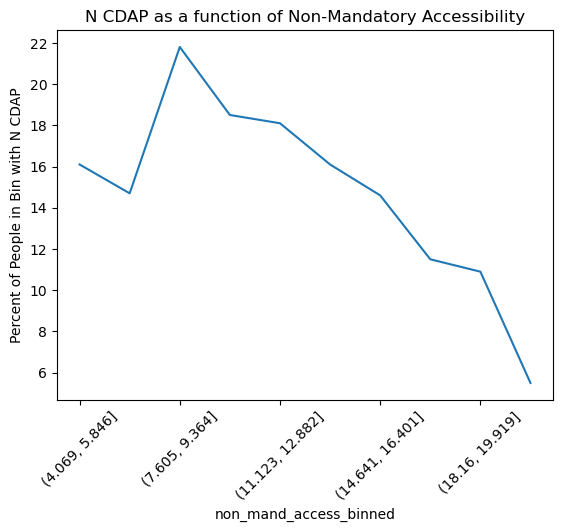

In [66]:
N_by_access_total = create_N_by_access(df, bins=10)
display(N_by_access_total)
N_by_access_total.percent_N.plot()
plt.xticks(rotation=45)
plt.ylabel('Percent of People in Bin with N CDAP')
plt.title('N CDAP as a function of Non-Mandatory Accessibility')
plt.show()

,num_persons,N_cdap,percent_N
non_mand_access_binned,,,
"(4.069, 5.846]",77,8,10.4
"(5.846, 7.605]",329,26,7.9
"(7.605, 9.364]",1154,170,14.7
"(9.364, 11.123]",2776,342,12.3
"(11.123, 12.882]",30109,4423,14.7
"(12.882, 14.641]",32503,4057,12.5
"(14.641, 16.401]",13786,1527,11.1
"(16.401, 18.16]",2916,255,8.7
"(18.16, 19.919]",1818,142,7.8


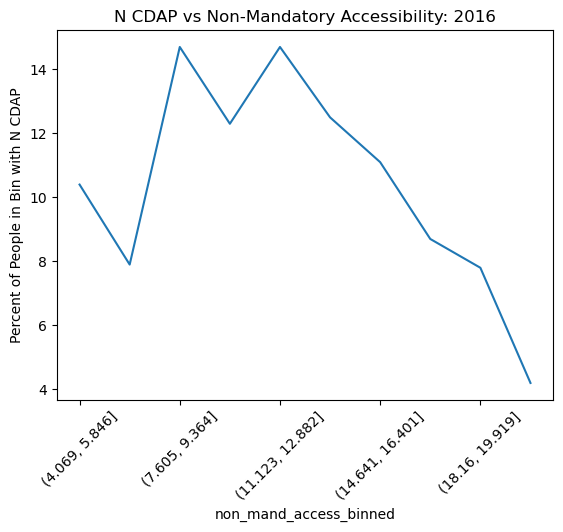

In [67]:
N_by_access_2016 = create_N_by_access(df[df.survey_year == 2016], bins=10)
display(N_by_access_2016)
N_by_access_2016.percent_N.plot()
plt.xticks(rotation=45)
plt.ylabel('Percent of People in Bin with N CDAP')
plt.title('N CDAP vs Non-Mandatory Accessibility: 2016')
plt.show()

,num_persons,N_cdap,percent_N
non_mand_access_binned,,,
"(4.07, 5.76]",87,14,16.1
"(5.76, 7.434]",268,51,19.0
"(7.434, 9.108]",1349,258,19.1
"(9.108, 10.781]",1679,359,21.4
"(10.781, 12.455]",22562,4183,18.5
"(12.455, 14.129]",37991,6483,17.1
"(14.129, 15.803]",17668,2704,15.3
"(15.803, 17.476]",3914,600,15.3
"(17.476, 19.15]",1493,159,10.6


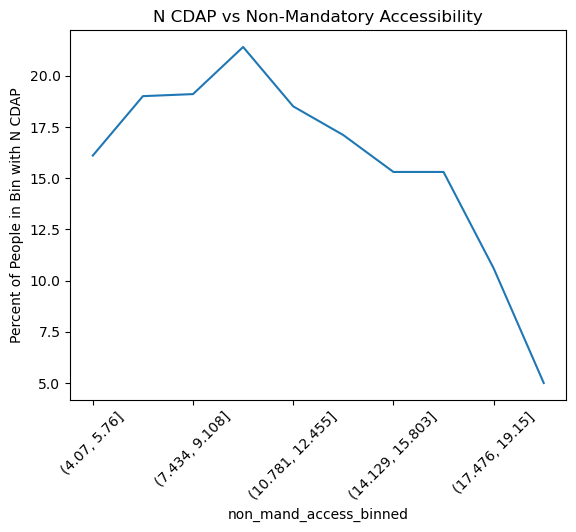

In [68]:
N_by_access_2016 = create_N_by_access(df[(df.auto_ownership > 0) & (df.auto_ownership >= df.num_workers)], bins=10)
display(N_by_access_2016)
N_by_access_2016.percent_N.plot()
plt.xticks(rotation=45)
plt.ylabel('Percent of People in Bin with N CDAP')
plt.title('N CDAP vs Non-Mandatory Accessibility')
plt.show()

## interaction_coef

In [69]:
data.interaction_coef

,activity,interaction_ptypes,coefficient,cardinality,slug
0,H,11,0,2,HH11
1,H,12,0,2,HH12
2,H,13,0,2,HH13
3,H,14,0,2,HH14
4,H,15,0,2,HH15
...,...,...,...,...,...
97,N,,0,4,NNNN
98,H,,0,4,HHHH
99,M,,0,5,MMMMM
100,N,,0,5,NNNNN


## Spec 1

In [70]:
# data.spec1

# Review Model

## Utility Functions for HHSize 1

In [71]:
model[0].utility_functions() ## HH Size = 1 

<xmle.Elem 'div' with 1 children>

## Utility Functions for HHSize 2

In [72]:
# model[1].utility_functions() ## HH Size = 2

# Re-Estimate Model

With the model setup for estimation, the next step is to estimate the model coefficients.  Make sure to use a sufficiently large enough household sample and set of zones to avoid an over-specified model, which does not have a numerically stable likelihood maximizing solution.  Larch has two built-in estimation methods: BHHH and SLSQP.  BHHH is the default and typically runs faster, but does not follow constraints on parameters.  SLSQP is safer, but slower, and may need additional iterations.

In [73]:
# r = model.estimate(method='BHHH', options={'maxiter':1000})
model.estimate(method='SLSQP', options={'maxiter':1500})

,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
coef_UNAVAILABLE,-999.000000,-999.0,0.0,-999.0,-999.0,1,,-999.000000
coef_age_80_plus_N,-0.322558,0.0,0.0,NaN,NaN,0,,-0.322558
coef_base_work_from_home_2016_N,0.300068,0.0,0.0,NaN,NaN,0,,0.300068
coef_base_work_from_home_N,0.300068,0.0,0.0,NaN,NaN,0,,0.300068
coef_base_zero_auto_M,-0.384002,0.0,0.0,NaN,NaN,0,,-0.384002
...,...,...,...,...,...,...,...,...
coef_N_144,-1.253670,0.0,0.0,NaN,NaN,0,,-1.253670
coef_N_177_178_187_188,-0.545579,0.0,0.0,NaN,NaN,0,,-0.545579
coef_N_277_278_287_288,-0.792091,0.0,0.0,NaN,NaN,0,,-0.792091
coef_N_777_778_788_888,-0.520221,0.0,0.0,NaN,NaN,0,,-0.520221


C:\Users\davidh\AppData\Local\Temp\2\ipykernel_6116\3991575622.py:2: PossibleOverspecification: WARNING: Model is possibly over-specified (hessian is nearly singular).
  model.estimate(method='SLSQP', options={'maxiter':1500})
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\linalg\__init__.py:18: UserWarning: minimum eig 9.942621551677667e-13 in general_inverse
  warnings.warn(f"minimum eig {min_eig} in general_inverse")


┣                x: coef_UNAVAILABLE                  -999.000000
┃                   coef_age_80_plus_N                  -0.322558
┃                   coef_base_work_from_home_2016_N      0.300068
┃                   coef_base_work_from_home_N           0.300068
┃                   coef_base_zero_auto_M               -0.384002
┃                                                         ...    
┃                   coef_N_144                          -1.253670
┃                   coef_N_177_178_187_188              -0.545579
┃                   coef_N_277_278_287_288              -0.792091
┃                   coef_N_777_778_788_888              -0.520221
┃                   coef_N_xxxxx                         0.167747
┃                   Length: 139, dtype: float64
┣          loglike: -57467.85473297321
┣        d_loglike: coef_UNAVAILABLE                   0.000000
┃                   coef_age_80_plus_N                -0.005528
┃                   coef_base_work_from_home_2016_N    0.005679
┃                   coef_base_work_from_home_N         0.005679
┃                   coef_base_zero_auto_M             -0.000799
┃                                                        ...   
┃                   coef_N_144                        -0.000760
┃                   coef_N_177_178_187_188             0.002466
┃                   coef_N_277_278_287_288            -0.001643
┃                   coef_N_777_778_788_888            -0.003594
┃                   coef_N_xxxxx                       0.001070
┃                   Length: 139, dtype: float64
┣              nit: 126
┣             nfev: 428
┣             njev: 126
┣           status: 0
┣          message: 'Optimization terminated successfully'
┣          success: True
┣     elapsed_time: datetime.timedelta(seconds=799, microseconds=748307)
┣           method: 'SLSQP'
┣          n_cases: 49327
┣ iteration_number: 126
┣          logloss: 1.1650385130450507

In [74]:
model.parameter_summary()

,Value,Std Err,t Stat,Signif,Null Value
coef_UNAVAILABLE,-999.,0.00,NA,,0.00
coef_age_80_plus_N,-0.323,0.0585,-5.51,***,0.00
coef_base_work_from_home_2016_N,0.300,0.0233,12.86,***,0.00
coef_base_work_from_home_N,0.300,0.0233,12.86,***,0.00
coef_base_zero_auto_M,-0.384,0.0636,-6.04,***,0.00
coef_base_zero_auto_N,-0.770,0.0617,-12.49,***,0.00
coef_driving_age_child_2016_asc_M,-0.108,0.316,-0.34,,0.00
coef_driving_age_child_2016_asc_N,-1.05,0.320,-3.27,**,0.00
coef_driving_age_child_asc_M,-1.21,0.317,-3.81,***,0.00
coef_driving_age_child_asc_N,-0.825,0.328,-2.52,*,0.00


# Output Estimation Results

In [ ]:
from larch.util.activitysim import update_coefficients
coefficients = update_coefficients(model, data)

In [ ]:
result_dir = data.edb_directory/'estimated'

In [ ]:
os.makedirs(result_dir, exist_ok=True)

### Write the re-estimated coefficients file

In [ ]:
coefficients.reset_index().to_csv(
    result_dir/"cdap_coefficients_revised.csv", 
    index=False,
)

### Write the model estimation report, including coefficient t-statistic and log likelihood

In [ ]:
for hh_size, submodel in enumerate(model, 1):
    if hh_size > 3: 
        break 
        # the largest HH sizes have massive model reports that 
        # Excel doesn't handle well; review them in Jupyter 
        # instead if you are interested
    submodel.to_xlsx(
        result_dir/f"cdap_model_estimation_hhsize{hh_size}.xlsx", 
        data_statistics=True,
    )

# Next Steps

The final step is to either manually or automatically copy the `cdap_coefficients.csv_revised.csv` file to the configs folder, rename it to `cdap_coefficients.csv.csv`, and run ActivitySim in simulation mode.

In [ ]:
pd.read_csv(result_dir/"cdap_coefficients_revised.csv")